In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'
DRAFTPATH = '/home/cosinga/hicolor_draft/figures/'
THBIAS = r'$b_{\mathrm{HI}} (k) = P_{\mathrm{HI-m}} (k) / P_{\mathrm{m}} (k)$'
OBSBIAS = r"$b_{\mathrm{HI}} (k) = \sqrt{P_{\mathrm{HI}} (k) / P_{\mathrm{m}} (k)}$"
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{HI-m}}(k)}{\sqrt{\mathrm{P}_{\mathrm{HI}}(k) \mathrm{P}_{\mathrm{m}}(k)}}$'
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'

def cclab(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    numerator = '\\mathrm{P}_{%s \\times %s}(%s)'%(name1, name2, fn)
    denom = '\\mathrm{P}_{%s}(%s) \\mathrm{P}_{%s}(%s)'%(name1, fn, name2, fn)
    CORRCOEF = 'r $(%s)$ = $\\frac{%s}{\\sqrt{%s}}$'%(fn, numerator, denom)
    return CORRCOEF

def ccrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    out = 'r$_{%s}$ $(%s)$ / r$_{%s}$ $(%s)$'%(name1, fn, name2, fn)
    return out

def pkrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    return "P$_{%s}$ $(%s)$ / P$_{%s}$ $(%s)$"%(name1, fn, name2, fn)

In [16]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs((-1,-1), frameon = False, loc = 'upper right', fontsize = 12)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 14, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 14, ha = 'center', va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.035, 20])
ds.axisLabelArgs('both', {'fontsize':16})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle', 'Matter'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('simname', ['tng100', 'tng300'], ['TNG100', 'TNG300'])
ds.displayAs('color', ['blue', 'red', 'resolved'], [r'HI $\times$ Blue', r'HI $\times$ Red', r'HI $\times$ Galaxies'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('color', 'resolved', {'color':'gray'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
ds.plotArgs('simname', 'tng100', {'color':'orange'})
ds.plotArgs('simname', 'tng300', {'color':'blue'})



The row values for fieldname: ['hisubhalo', 'hiptl', 'vn']
The column values for space: ['real', 'redshift', 'rsd']


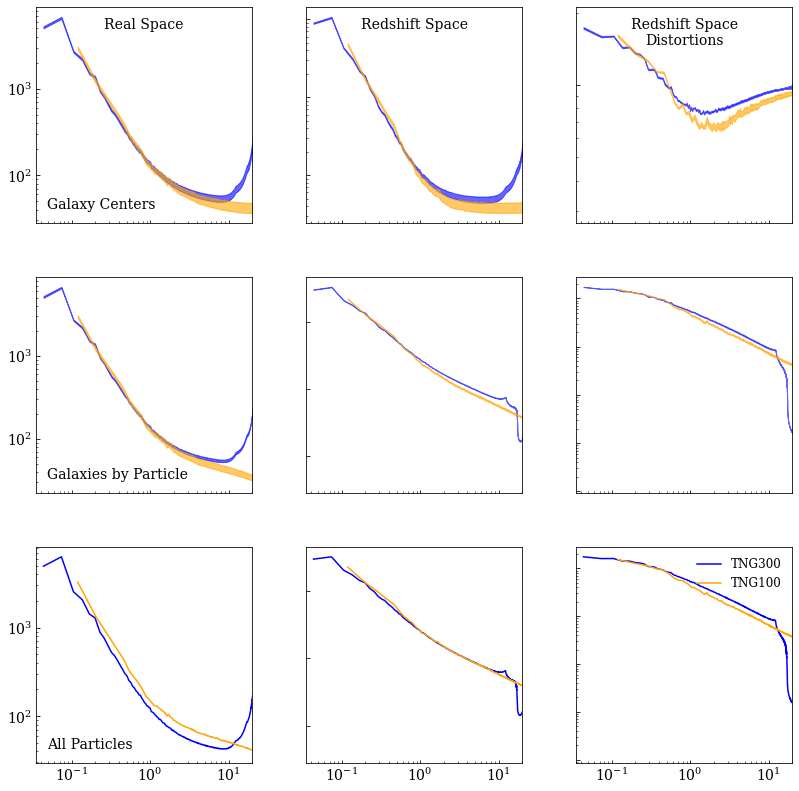

In [17]:
ip = {'simname':['tng300', 'tng100'], 'path':'fiducial', 'is_hydrogen':True, 'is_auto':True, 
      'snapshot':99, 'fieldname':['hisubhalo', 'hiptl', 'vn']}
fg = ds.figrid('simname', 'fieldname', 'space', ip)
fg.autoFill(alpha = 0.6)
fg.setDefaultTicksParams()
fg.plot()

The row values for color: ['blue', 'red', 'resolved']
The column values for space: ['real', 'redshift', 'rsd']


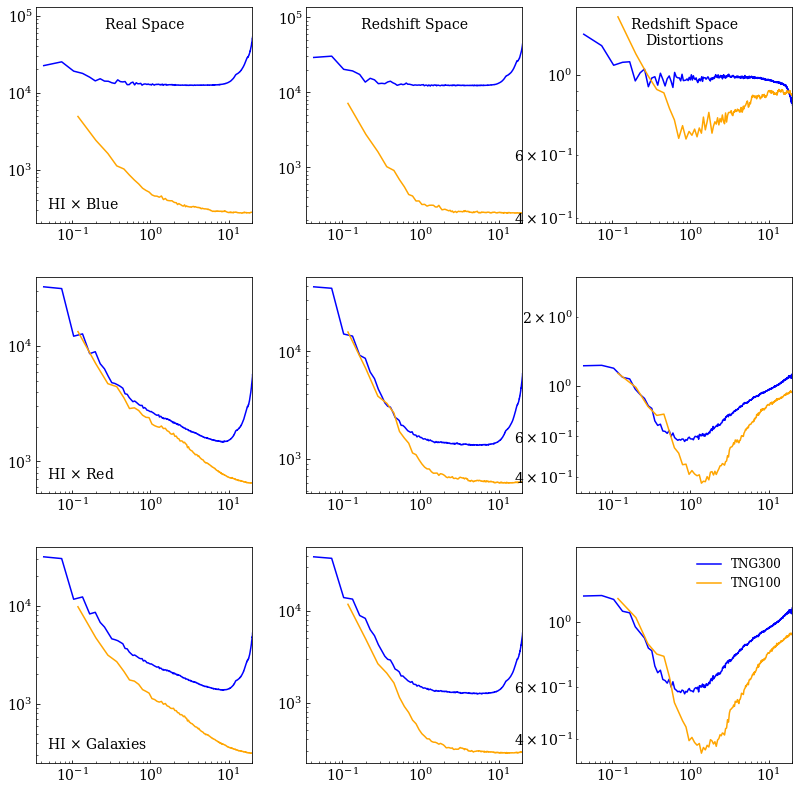

In [19]:
ip = {'simname':['tng300', 'tng100'], 'path':'fiducial', 'is_auto':True, 
      'snapshot':99, 'fieldname':['galaxy'], 'color':['blue', 'red', 'resolved']}
fg = ds.figrid('simname', 'color', 'space', ip)
fg.plot()

array([ 0.04341288,  0.07355669,  0.10462391,  0.13578833,  0.16756584,
        0.19745789,  0.22813252,  0.25893781,  0.29001768,  0.32079145,
        0.35105526,  0.38184687,  0.41319019,  0.44374901,  0.47418487,
        0.50476246,  0.53540314,  0.56611858,  0.59691203,  0.62771574,
        0.65829307,  0.68875588,  0.71957735,  0.75017809,  0.78080856,
        0.81170301,  0.84253446,  0.8730562 ,  0.90358717,  0.93405209,
        0.96482433,  0.99557938,  1.02631185,  1.05702913,  1.08765867,
        1.11835123,  1.14884952,  1.17946858,  1.21017392,  1.24072793,
        1.27138256,  1.30207677,  1.33288944,  1.36367301,  1.39432502,
        1.42481769,  1.45534139,  1.48604031,  1.51672153,  1.54739911,
        1.57814028,  1.60886255,  1.63959826,  1.67009774,  1.70072107,
        1.7314203 ,  1.7619107 ,  1.79256931,  1.82324283,  1.85397758,
        1.88465359,  1.91519033,  1.94598268,  1.97662109,  2.00727633,
        2.03795818,  2.06848812,  2.09923204,  2.12993101,  2.16